<a href="https://colab.research.google.com/github/Sharath-11507563/sharath_INFO5731_-Fall2021/blob/main/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Write your code here
# Saving the train data in a dataframe
import pandas as pd
train_data = pd.read_csv('stsa-train.txt',sep = 'delimiter=',header= None,names=['reviews'])
train_data[['sentiment','reviews']] = train_data['reviews'].str.split(" ", 1, expand=True)
train_data.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,reviews,sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
# Saving the test data in a dataframe
test_data = pd.read_csv('stsa-test.txt',sep = 'delimiter=',header= None,names=['reviews'])
test_data[['sentiment','reviews']] = test_data['reviews'].str.split(" ", 1, expand=True)
test_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,reviews,sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
# Importing libraries for data cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean(review):
    review ="".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+',review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Finding the frequency of the individual words in the reviews using tf-idf vectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean)
X_tfidf = tfidf_vect.fit_transform(train_data['reviews'])

print(X_tfidf.shape)


# Saving both the train and test words in a different data frame 
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_test_tfidf = tfidf_vect.transform(test_data['reviews'])
print(X_test_tfidf.shape)

(6920, 13343)
(1821, 13343)


In [ ]:
# Algortihms - 1) MultinomialNB
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# Sampling the training set
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_df, train_data['sentiment'].values,
                                                test_size=0.2, random_state=42)
# Model fit using .fit()
model_mnb = mnb.fit(x_train,y_train)
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [ ]:
# Calculating the cross-validation scores 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=10)
print("MultinominalNB score: ",scores.mean())

MultinominalNB score:  0.7247054530288813


In [ ]:
# 2)SVM
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier

svm = LinearSVC()
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))


Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
# Calculating the cross-validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, x_test, y_test, cv=10)
print("SVM score:",scores.mean())

SVM score: 0.7348034615785632


In [ ]:
# 3) KNeighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model_knn = knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_knn,y_test))
print(classification_report(y_test,y_pred_knn))

Accuracy 0.7398843930635838
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
# Calculating cross-value score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_test, y_test, cv=10)
print("KNN score:",scores.mean())

KNN score: 0.6675737670732979


In [ ]:
# 4) Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_dt,y_test))
print(classification_report(y_test,y_pred_dt))

Accuracy 0.6567919075144508
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       671
           1       0.65      0.71      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.65      1384
weighted avg       0.66      0.66      0.66      1384



In [ ]:
# Calculating cross value score
scores = cross_val_score(dt, x_test, y_test, cv=10)
print("Decision tree score:",scores.mean())

Decision tree score: 0.5996455009905118


In [ ]:
# 5) Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_rf,y_test))
print(classification_report(y_test,y_pred_rf))

Accuracy 0.7456647398843931
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       671
           1       0.72      0.83      0.77       713

    accuracy                           0.75      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.75      0.74      1384



In [ ]:
# Random Forest - Calculate cross value score
cores = cross_val_score(rf, x_test, y_test, cv=10)
print("Random forest score",scores.mean())

Random forest score 0.5996455009905118


In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_xgb = xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_xgb,y_test))
print(classification_report(y_test,y_pred_xgb))

Accuracy 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384



In [ ]:
# XGBoost - Calculate cross value score
scores = cross_val_score(xgb, x_test, y_test, cv=10)
print("XGBoost score:",scores.mean())

XGBoost score: 0.6184704410384736


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
import pandas as pd
df = pd.read_csv('Amazon_Unlocked.csv')
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
1994,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,2,i have owned this device for two months and th...,2.0
1995,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,5,Amazing phone! For $250 it compares if not out...,0.0
1996,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,1,I bought this phone for my daughter last June ...,24.0
1997,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,5,Excellent phone,1.0


In [ ]:
# Cleaning the data before beginning clustering 
#lower casing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import Word
nltk.download('wordnet')

df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone u used hard phone ...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


K-means clustering

In [ ]:
# To find out the term frequencies before forming cluster
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'].values.astype('U'))
names= tfidf_vect.get_feature_names()

#forming 9 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 9,init='k-means++', n_jobs = -1,max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({0: 755, 1: 758, 2: 81, 3: 67, 4: 80, 5: 26, 6: 57, 7: 93, 8: 82})

In [ ]:
# Clusters containing words with maximum strength
top_words = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(6):
    key_features = [names[i] for i in centroids[cluster_num, :top_words]]
    print('Cluster '+str(cluster_num+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['phone', 'good', 'work', 'screen', 'like', 'one', 'would']
Cluster 2
Top Words: ['work', 'ok', 'good', 'phone', 'product', 'fine', 'like']
Cluster 3
Top Words: ['excellent', 'product', 'recommend', 'arrived', 'condition', 'thank', 'seller']
Cluster 4
Top Words: ['nice', 'phone', 'price', 'big', 'use', 'camera', 'really']
Cluster 5
Top Words: ['great', 'phone', 'work', 'price', 'product', 'good', 'luv']
Cluster 6
Top Words: ['excelent', 'price', 'seller', 'product', 'thank', 'choice', 'cellphone']


In [ ]:
cluster_center=model.cluster_centers_
cluster_center

array([[9.10706865e-05, 0.00000000e+00, 8.68487416e-05, ...,
        8.98620296e-04, 7.06227117e-05, 4.63733230e-04],
       [0.00000000e+00, 5.16321430e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# DBSCAN
reviews=[]
for i in df['Reviews']:
    reviews.append(str(i).split())
import gensim
w2v_model=gensim.models.Word2Vec(reviews, size=100, workers=4)

import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[199]

vectors.shape

(1999, 100)

In [ ]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

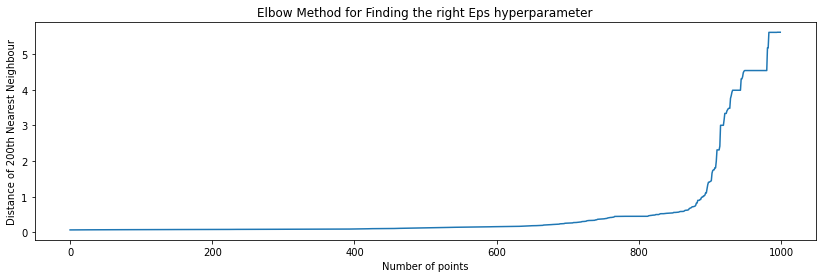

In [ ]:
# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

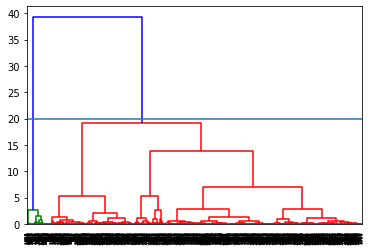

In [ ]:
# Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)
# K-means clustering is based on the distance between the data points and the centroids of the clusters themselves. DBSCAN is
# used to perform clustering that is based on density. Here the areas where the points are concetrated the most are found and are segregated 
# from empty space. Hierarchical clustering, as the name suggests involves clustering in layers. It begins with considering each data point 
# as a seperate cluster and then finds the two clusters that are closer to each other. 

